# Plotting with Seaborn and Pandas - Exercise

This exercise deals with the seaborn package which we will use to create plots for the *Data Exploration Tasks*.
Seaborn is a nice library to produce plots very quickly. However, customization of the generated plots requires knowledge about the underlying matplotlib library, which is beyond the scope of this course.

For this exercise we will use two different datasets: the **house price** data set and the **titanic** data set which we will use for **regression** and **classification** tasks in the following exercises.

As always, we start by importing the necessary libraries:

In [1]:
# Load standard packages
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np

# To show plots directly in jupyter
%matplotlib inline

# Set default figure and font size for all plots
matplotlib.rcParams['figure.figsize'] = (12.0, 9.0)
matplotlib.rcParams.update({'font.size': 12})

## 1. House Price Dataset
In this part of the exercise we analyze the famous Ames Housing data from Dean De Cock. It contains 79 features to predict house prices. It can be thought of as a complex version of the famous boston dataset, which is widely used for regression tasks but which only includes numerical features. For further details you may have a look at http://ww2.amstat.org/publications/jse/v19n3/decock.pdf and https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt.

Please load the dataset from the path **'../data/houses.csv'** as a dataframe called **houses**. 
Before we start creating plots, please **answer the following questions**:

- how many rows and columns does the dataset hold?
- how many numerical and non-numerical (categorical) variables?
- which feature includes the most null values?

In [2]:
# solution
houses = pd.read_csv('../data/houses.csv')

In [3]:
# solution
houses.info()

# Answers:
# 3. Pool QC contains only 7 non-null values
# 2. 43 objects (categories) and 38 numerical values
# 1. 81 columns and 1460 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 1.1 Histograms and Distributions
Please plot a histogram of the target **'SalePrice'** by using the method **sns.distplot(df[column])**.
Furthermore, change the option **kde** to False and set the number of **bins** to 30.

**Remark**: Use Shift+Tab inside the parantheses to get the docstring of the function.

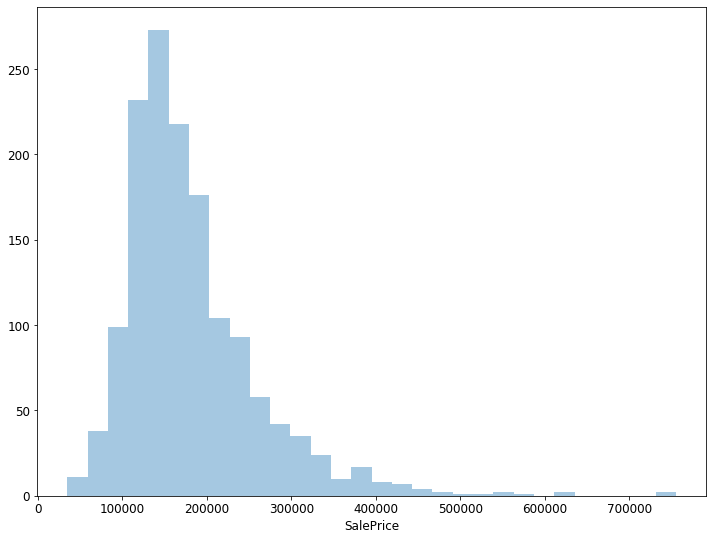

In [3]:
# solution
sns.distplot(houses['SalePrice'], kde=False, bins=30)

Please describe the plot and answer the following questions:
- where is (roughly) the location of the global maximum of the distribution?
- is the data normally distributed? If not, do you have an idea how to transform the data that it follows a normal distribution?
- can you argue why the distribution looks like this?

[Text(0, 0.5, 'kde'), Text(0.5, 0, 'log(SalePrice)')]

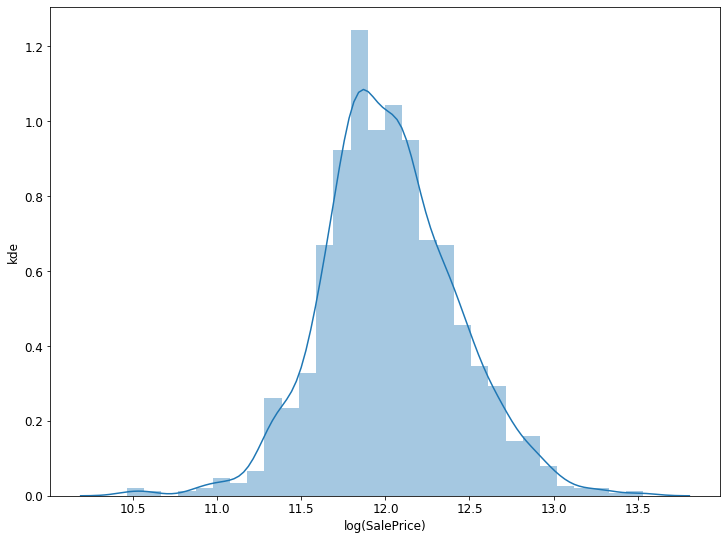

In [4]:
# solution
# 1. maximum roughly at 150 000
# 2. right skewed
# 2. log transform
# 2. many outliers to the right
# 3. only a few houses are extremly expensive (outliers to the right)

# log transform
ax = sns.distplot(np.log(houses['SalePrice']), kde=True, bins=30)
ax.set(xlabel='log(SalePrice)', ylabel='kde')

Next, plot the distribution of the feature **'GrLivArea'** which describes the *above grade (ground) living area square feet*. Play around with the options **kde** and **bins**. Describe the distribution.

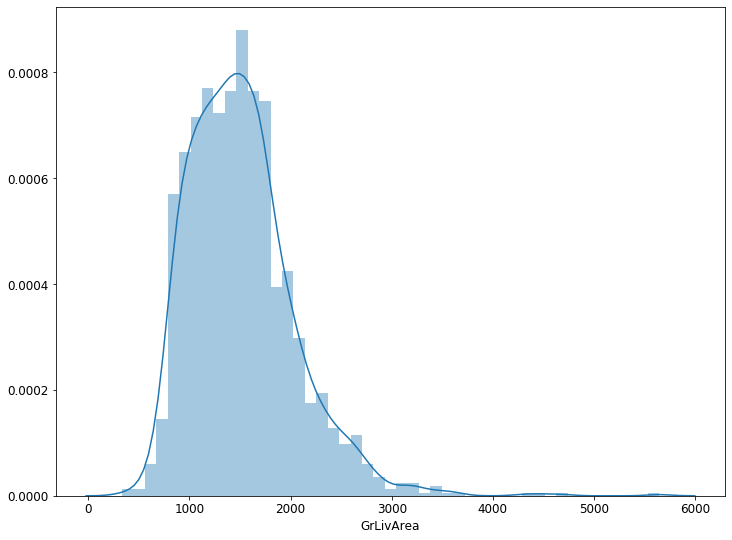

In [5]:
# solution
sns.distplot(houses['GrLivArea'])
# right skewed.

Maybe there is a correlation between the target **'SalePrice'** and the feature **'GrLivArea'**. Let us create a scatter plot where we plot the feature **'GrLivArea'** on the **x-axis** and **'SalePrice'** on the **y-axis**.
In seaborn we can use the method **regplot()** which is actually a regression plot and allows us to fit the data already.

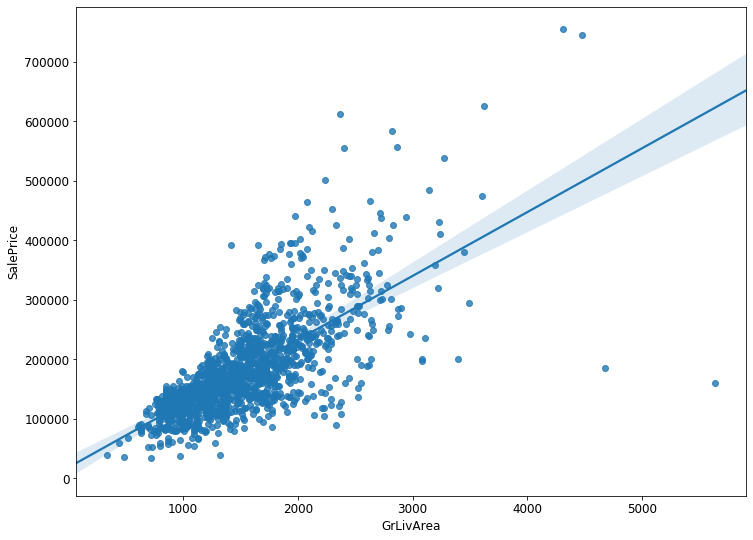

In [6]:
# solution
sns.regplot(data=houses, x='GrLivArea', y='SalePrice')

Please, **describe the plot**.

Furthermore, we see a linear regression model fit with uncertainty bands. The translucent band lines describe a bootstrap confidence interval generated for the estimate.

In order to get the single distributions and the joint distribution combined in one plot we can use the **jointplot()** method from seaborn.
Please, use the method for the two attributes **'1stFlrSF'** (First Floor square feet) and **'SalePrice'**. First, produce the plot with the default function arguments. Second, change the argument **kind** once to **reg**, **hex** and **kde**.

Since most of the data points are located in the lower left corner, please try to plot only data points where **x < 3000** and **y < 500000**.

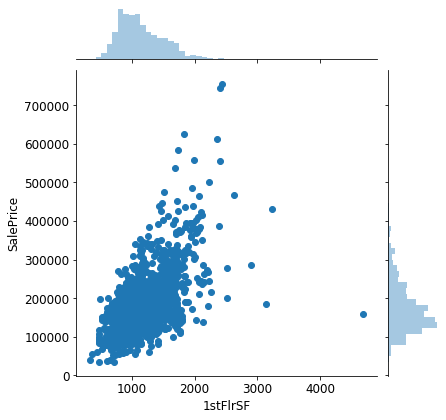

In [7]:
# solution (default)
sns.jointplot(data=houses, x='1stFlrSF', y='SalePrice')

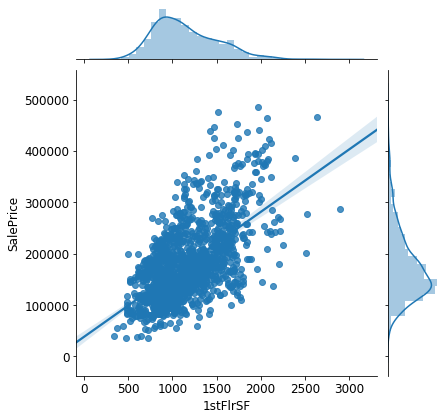

In [8]:
# solution (kind reg)
houses_lim = houses[(houses.SalePrice < 500000) & (houses['1stFlrSF'] < 3000)]
sns.jointplot(data=houses_lim, x='1stFlrSF', y='SalePrice', kind='reg')

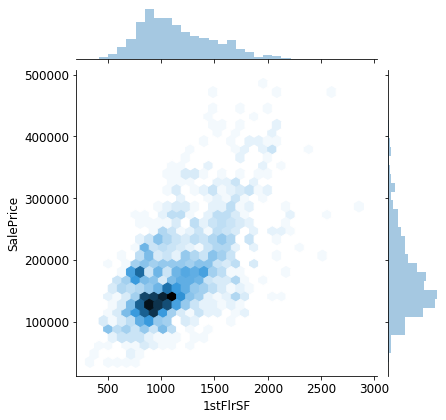

In [9]:
# solution (kind reg)
sns.jointplot(data=houses_lim, x='1stFlrSF', y='SalePrice', kind='hex')

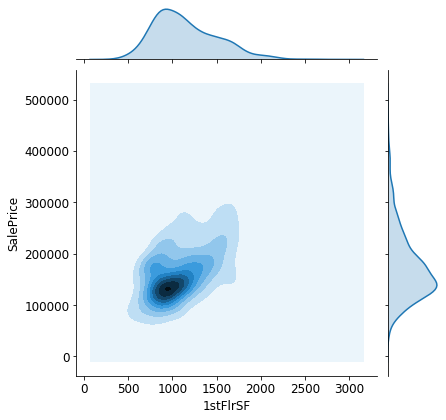

In [10]:
# solution (kind kde)
sns.jointplot(data=houses_lim, x='1stFlrSF', y='SalePrice', kind='kde')

Of course, we could have set the x and the y limits directly on the plot (using the matplotlib API) instead of using conditional indexing.

Would it have made any difference, e.g. for the regression plot? **Try to explain it**.

In [11]:
# solution
# yes, all points would have been used for the regression instead of only the using the subset
# heatmap scale would be different

### 1.2 Heatmap
We have already seen that we have at least two good features to explain the target. What about the remaining ones? In order to make a quick check it is useful to compute the correlation matrix. Afterwards, the matrix can be represented as a heatmap.

First, **compute the correlation matrix** of the houses dataframe. Call the resulting dataframe/matrix **houses_corr**.

In [12]:
# solution
houses_corr = houses.corr()
houses_corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


Next, use the function **heatmap()** and pass the correlation matrix as the only argument.

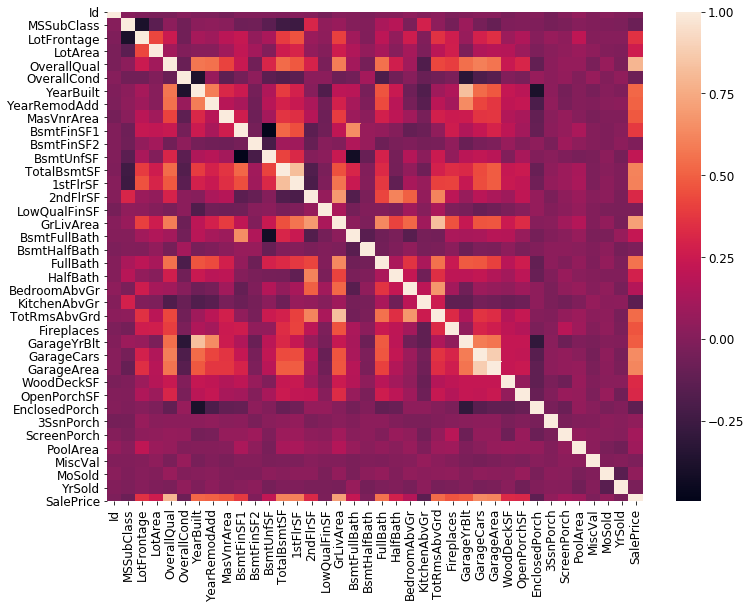

In [13]:
# solution
sns.heatmap(houses_corr)

This does not look very nice and we have **redundant datapoints** (upper and lower triangles represent the same information). This can be solved by using a **mask matrix**.
Please execute the following statements, where we first compute a matrix which has the same shape as the corr matrix but contains only zeros. Afterwards, we fill the upper triangle of the mask matrix with the boolean value True. This can be done by using the numpy method np.triu_indices_from(mask). Finally, we can use the mask matrix and make further adjustments to get a nice heatmap of the correlation matrix.

In [14]:
# solution (not part of the exercise)
mask = np.zeros_like(houses_corr)
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# solution (not part of the exercise)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

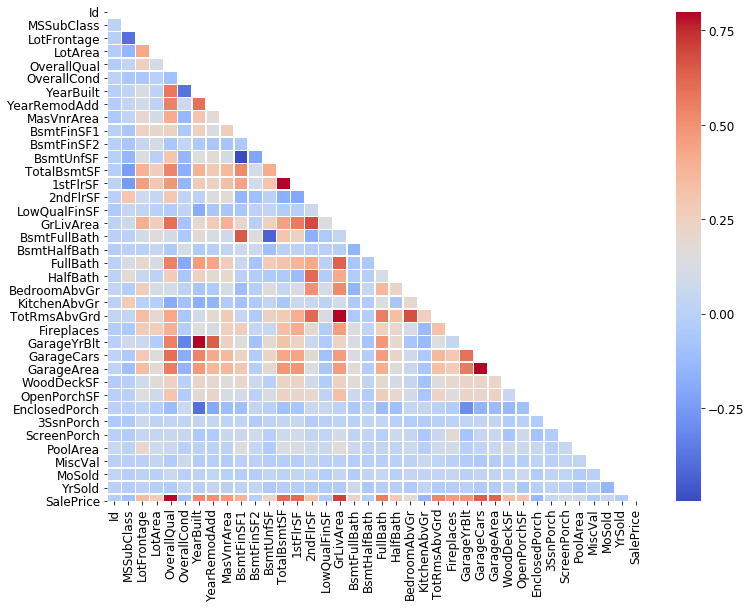

In [16]:
# solution (not part of the exercise)
ax = sns.heatmap(houses_corr, mask=mask, cmap='coolwarm', linewidths=0.5, vmax=.8)

This looks much nicer. Please, **answer the following questions**:

- which features are highly correlated and anticorrelated?
- which features are highly correlated and anticorrelated with the target?
- if there is no correlaton between the feature and the target, does it mean that there is no dependence?

Of course, in real life data exploration does not end here. But due to the lack of time we have to move on and investigate another dataset.

## 2. Titanic Dataset

This is one of the most famous datasets for machine learning beginners. This dataset contains **passenger data from the titanic**. In one of the following exercises we try to build a classifier which allows us to predict if someone survived or died on the titanic. But first, let us explore the data.

Import the data set **'../data/titanic_new.csv'** and call the resulting dataframe **titanic**. Get familiar with the dataset by using the **info**, **describe** and **head** method.

In [17]:
# solution
titanic = pd.read_csv('../data/titanic_new.csv')

In [18]:
# solution
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# solution
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# solution
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.1 Countplots

Use the seaborn method **countplot()** to visualize the number of survived and died passengers.
Set **data=titanic** and **x='Survived'**.

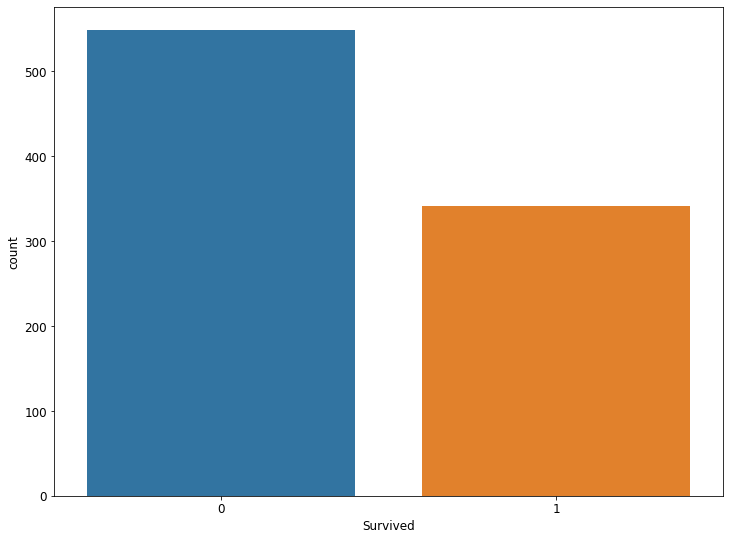

In [21]:
# solution
sns.countplot(data=titanic, x='Survived')

Ok, a lot of people died as we know it from history and movies. Let's see if there was a **difference in sex** in the number of died passengers.
Therefore, an easy option is the **hue** argument in several seaborn plotting methods. Please use **hue='Survived'** and **x='Sex'** in the **countplot** method.

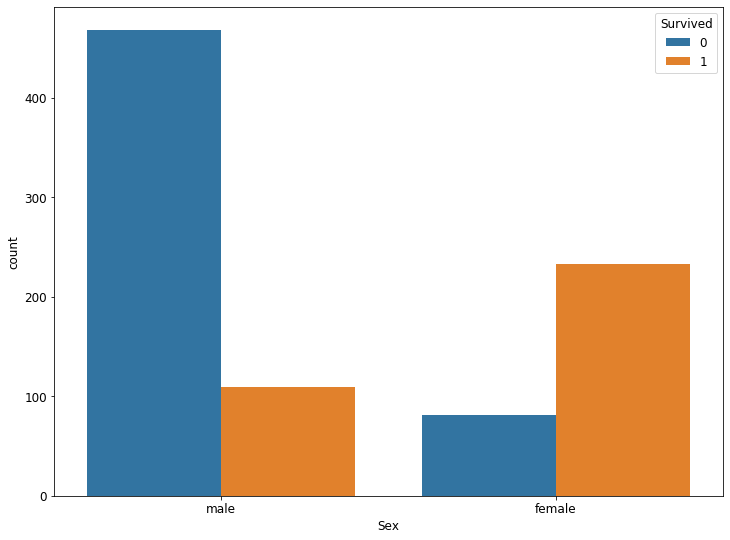

In [22]:
# solution
sns.countplot(data=titanic, hue='Survived', x='Sex')

Next, set **x** to **'Pclass'** and keep **hue='Survived'**.

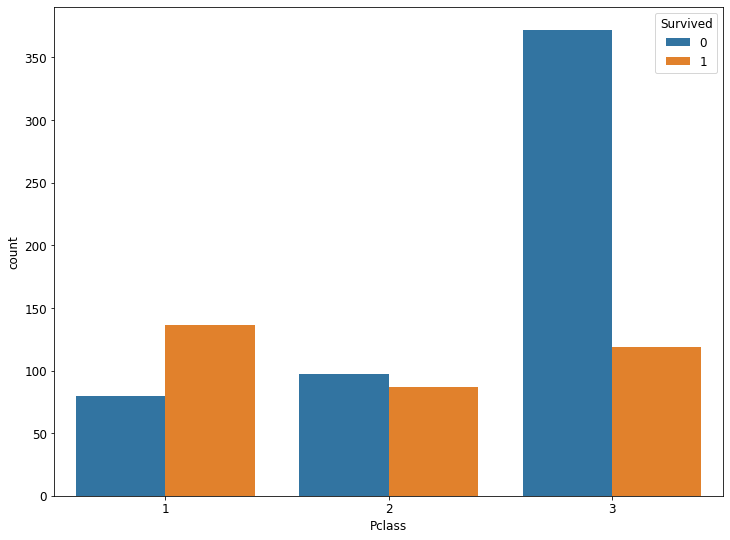

In [23]:
# solution
sns.countplot(data=titanic, hue='Survived', x='Pclass')

**Bonus**:

Create three different countplots, one for each class, and look at the different survival counts with respect to Sex.

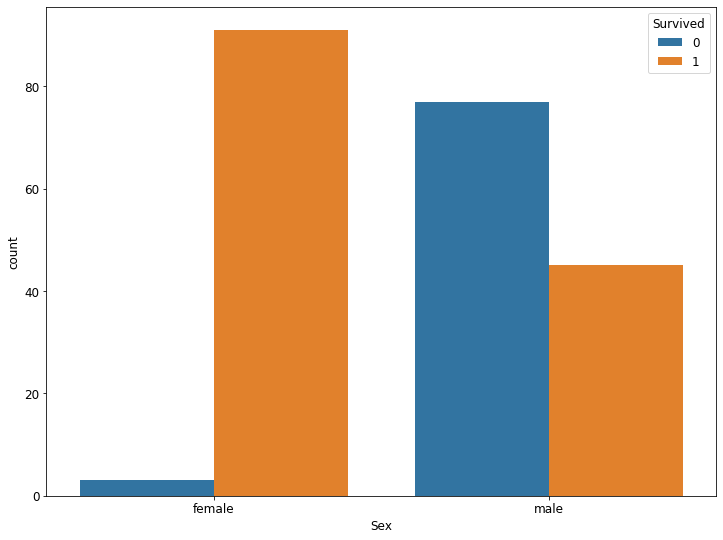

In [24]:
sns.countplot(data=titanic[titanic['Pclass'] == 1], hue='Survived', x='Sex',  order=['female', 'male'])

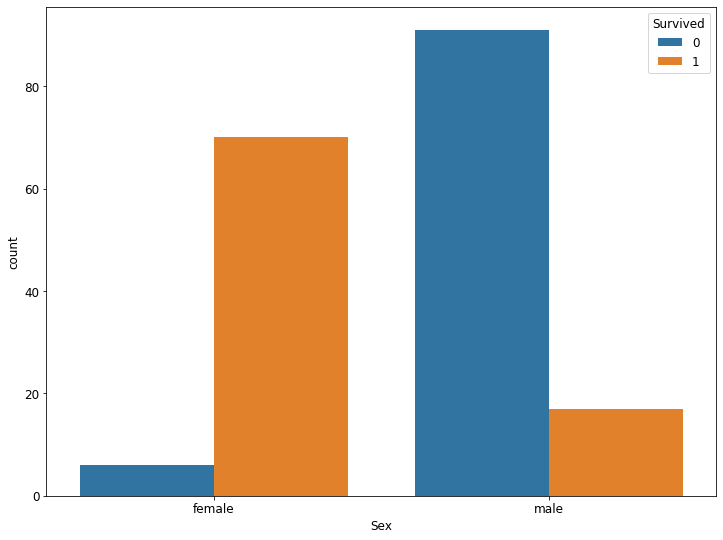

In [25]:
sns.countplot(data=titanic[titanic['Pclass'] == 2], hue='Survived', x='Sex',
              order=['female', 'male'])

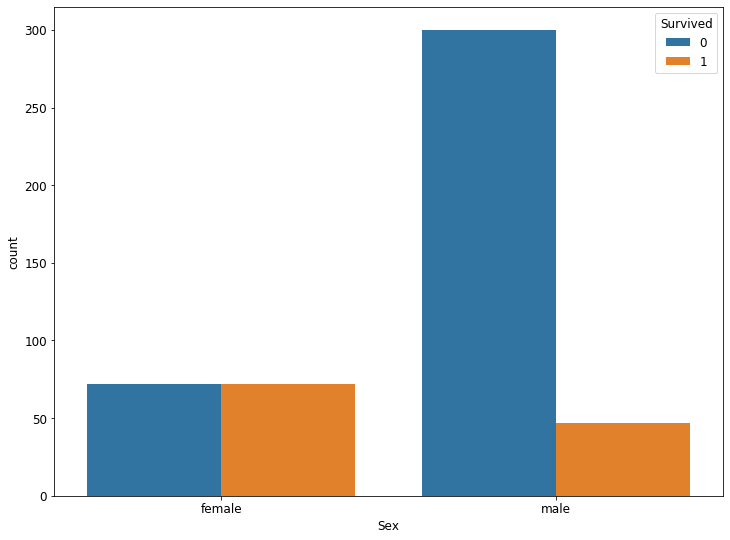

In [26]:
sns.countplot(data=titanic[titanic['Pclass'] == 3], hue='Survived', x='Sex',
              order=['female', 'male'])

This is as expected: a larger percentage of the first class passengers survived compared to the second and third class.

### 2.2 Boxplots

Next, let's have a look at some distributions, but this time we use boxplots. Use the method **sns.boxplot()** and set **y** to the **'Age'** column and **x** to the **'Survived'** column. Afterwards, **describe what you see**.

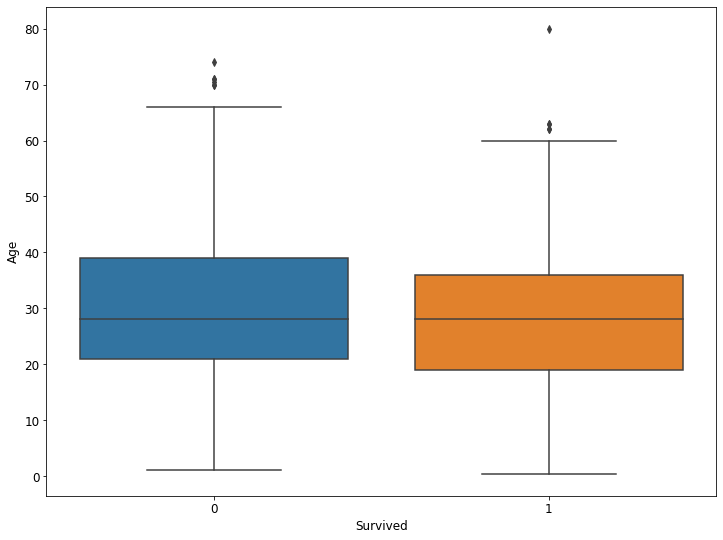

In [27]:
# solution
sns.boxplot(data=titanic, y='Age', x='Survived')

Next, set **x** to **'Pclass'**.

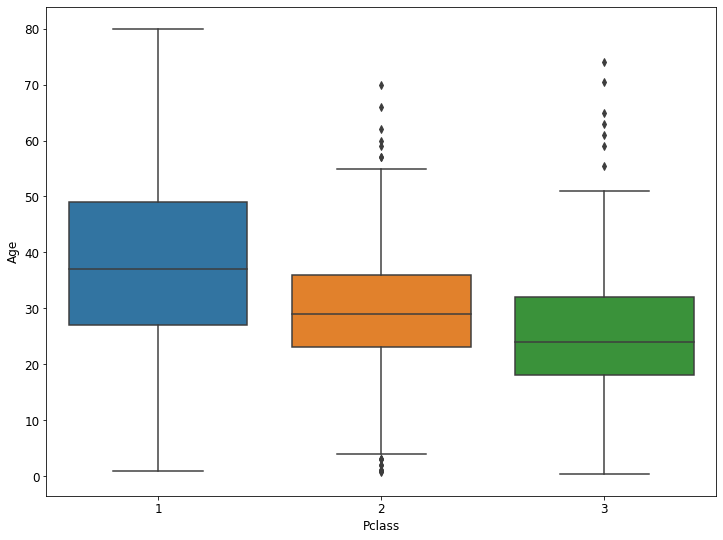

In [28]:
# solution
sns.boxplot(data=titanic, y='Age', x='Pclass')

The median of the age for the first class passengers is much higher (~40) than for the second (~30) and third (~25) class. 

Next, set **hue** once to **'Sex'** and once to **'Survived'**.

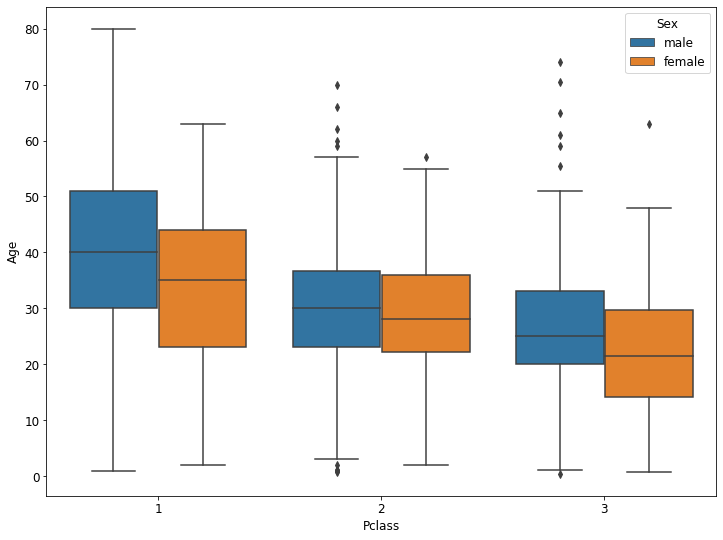

In [29]:
# solution
sns.boxplot(data=titanic, y='Age', x='Pclass', hue='Sex')

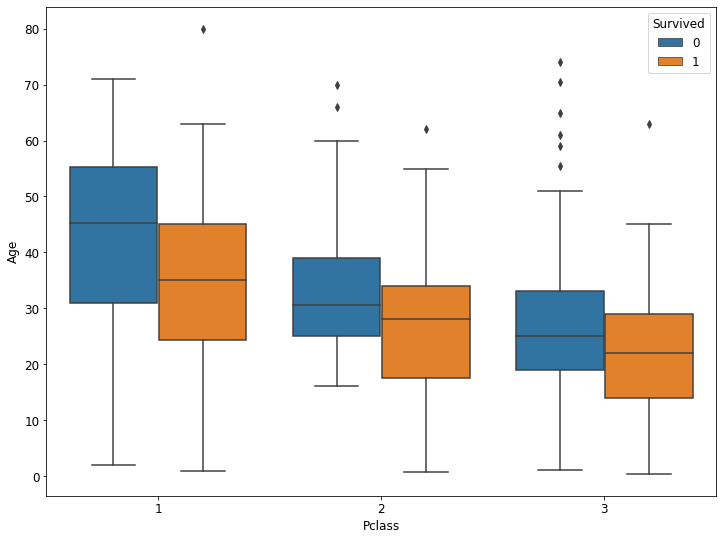

In [30]:
# solution
sns.boxplot(data=titanic, y='Age', x='Pclass', hue='Survived')

Please describe the distributions.

### This is the end of the exercise.